In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q

# Tarea 1

## Ecuaciones Ordinarias

1.

## Para $f(x)= x^2$:
$$
\begin{align*}
f'(x)&= \lim_{h \to 0} \frac{-(x+2h)^2 + 4(x+h)^2 -3x^2}{2h}\\
&=\lim_{h \to 0} \frac{-(x^2 +4xh +4h^2) + 4(x^2 +2xh+h^2) -3x^2}{2h}\\
&=\lim_{h \to 0} \frac{-x^2 -4xh-4h^2 + 4x^2 +8xh+4h^2-3x^2}{2h}\\
&= \lim_{h \to 0} \frac{-4xh+8xh}{2h}\\
&=\lim_{h \to 0} \frac{-4x +8x}{2}\\
&=\frac{4x}{2}\\
&=2x
\end{align*}
$$

Esto es consistente con la primera derivada de la función $f(x)=x^2$

Para la segunda derivada
$$
\begin{align*}
f''(x)&= \lim_{h \to 0} \frac{(x+h)^2 - 2x^2 +(x-h)^2}{h^2}\\
&=\lim_{h \to 0} \frac{x^2 +2xh+h^2 - 2x^2+ x^2-2xh+h^2}{h^2}\\
&=\lim_{h \to 0} \frac{2h^2}{h^2}\\
&= \lim_{h \to 0} 2\\
&=2
\end{align*}
$$

Esto es consistente con la segunda derivada de la función $f(x)=x^2$


## Para $f(x)=sin(x)$:
$$
\begin{align*}
f'(x)&= \lim_{h \to 0} \frac{-sin(x+2h) +4sin(x+h) -3sin(x)}{2h}= \frac{4sin(x)-4sin(x)}{2*0}=\frac{0}{0}\\
l'hôpital&\Rightarrow\lim_{h \to 0} \frac{-2cos(x+2h)+4cos(x+h)}{2}\\
&=\lim_{h \to 0} -cos(x+2h)+2cos(x+h)\\
&= -cos(x)+2cos(x)\\
&=cos(x)
\end{align*}
$$

Esto es consistente con la primera derivada de la función $f(x)=sin(x)$

Para la segunda derivada:

$$
\begin{align*}
f''(x)&= \lim_{h \to 0} \frac{sin(x+h)-2sin(x)+sin(x-h)}{h^2}= \frac{2sin(x)-2sin(x)}{2*0}=\frac{0}{0}\\
l'hôpital& \Rightarrow\lim_{h \to 0} \frac{cos(x+h)-cos(x-h)}{2h}=\frac{cos(x)-cos(x)}{2*0}=\frac{0}{0}\\
l'hôpital& \Rightarrow\lim_{h \to 0} \frac{-sin(x+h)-sin(x-h)}{2}\\
&= \frac{-2sin(x)}{2}\\
&=-sin(x)
\end{align*}
$$

Esto es consistente con la segunda derivada de la función $f(x)=sin(x)$


:)

2.

In [129]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        self.sigma = 1.5*self.radius
        
        self.epsilon = 1500
        self.VEk = np.zeros(len(t))
        self.Ep = 0.
        self.VEp = np.zeros(len(t))
        
        
    
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
  #      self.r += self.dt*self.v
   #     self.v += self.dt*self.a
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        self.SetPotentialEnergy(i)
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        #Fn = 4*self.epsilon*( 12*self.sigma**12/d**13 - 6*self.sigma**6/d**7  )
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial 
            self.Ep += (self.K/4)*(compresion**4)
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
        
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        self.VEp[i]=self.Ep
    
    def SetPotentialEnergy(self,i):
        self.VEp[i] = self.Ep
    
        
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotential(self,scale=1):
        return self.U[::scale]
    
    def GetPotentialEnergy(self,scale=1):
        return self.VEp[::scale]
    

In [130]:
def GetTenParticles(N,t):
    i=0
    TenParticles=[]
    while i<10:
        r=np.array([rand.uniform(-20.,20.),rand.uniform(-20.,20.)])
        v=np.array([rand.uniform(-5.,5.),rand.uniform(-5.,5.)])
        a=np.array([0.,0.])
        particle=Particle(r,v,a,t,m=1,radius=2,Id=i)
        
        i+=1
        TenParticles.append(particle)
        
    return TenParticles
        

In [131]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetTenParticles(1,t)

In [132]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
           
            
    return Particles

In [133]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 10000/10000 [00:07<00:00, 1260.71 Steps/s]


In [134]:
scale = 200
t1 = t[::scale]


<IPython.core.display.Javascript object>


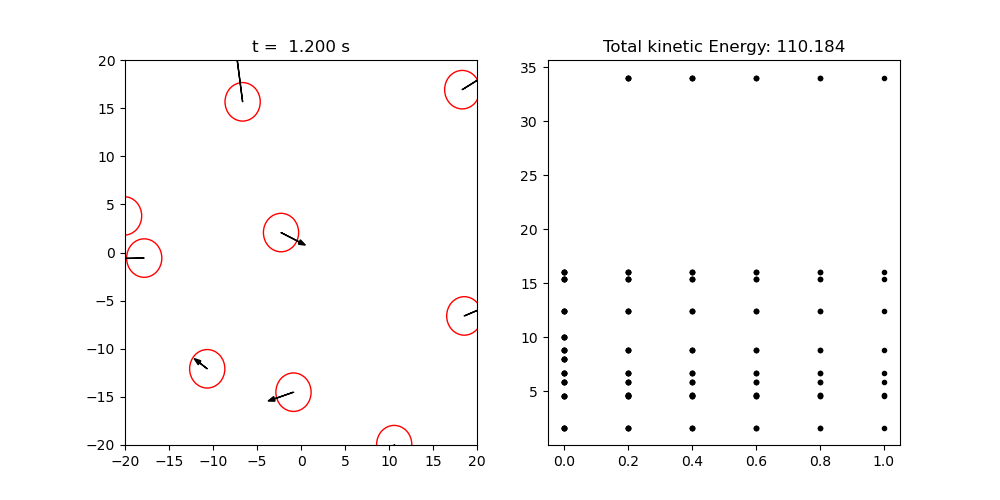

In [135]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)


a,b)

In [136]:
MomentumT = Particles[0].GetMomentum(scale)


In [137]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))


<IPython.core.display.Javascript object>


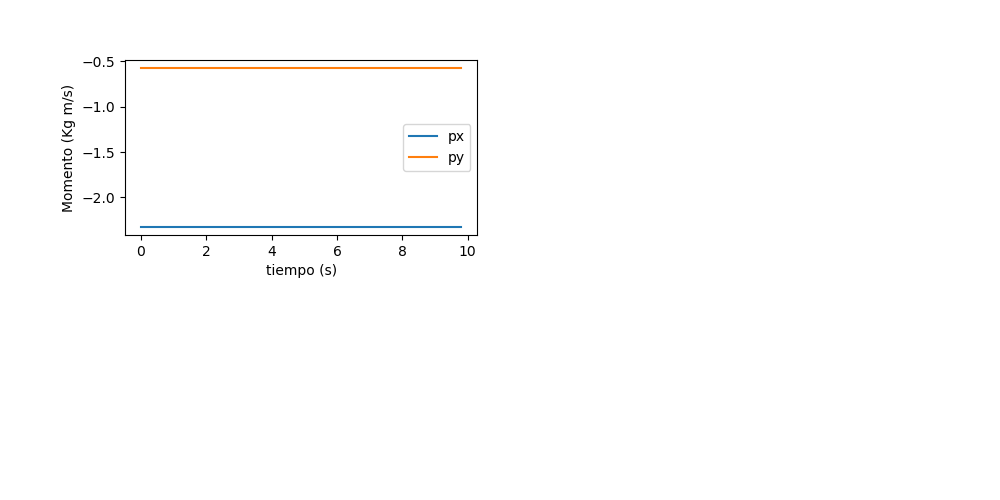

Text(0, 0.5, 'Momento (Kg m/s)')

In [138]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("Momento (Kg m/s)")

Si se separa el momento en las componentes x y y, sí se debería conservar ya que solo hay colisiones entre las partículas por lo cual se mantiene la masa de cada una y varía su velocidad al interactuar con la partícula con la que choque. Como se considera el momento total de todas las partículas, es invariante ya que se trasmite entre las partículas, mas no se dispersa.

c)


Se puede afirmar que la fuerza de contacto es conservativa ya que al colisionar, la fuerza que ejerce una partícula sobre la otra no transfiere energía hacia el exterior. De modo que no varía la energía mecánica del sistema, a pesar de que la energía cinética y potencial no se conserven por sí mismas.

Partiendo de la expresión que describe la fuerza de contacto:
    
$$
\vec F_{n}=K*d^3
$$
donde K es la rigidez y d corresponde a cuánto se comprime la partícula durante la colisión.

Teniendo en cuenta, que tras la colisión no se disipa energía y la partícula vuelve a su forma original, esta fuerza es conservativa.

Además se puede hallar la energía potencial de la siguiente manera:

$$
\begin{align*}
U_{elástica}&=^- \int_{0}^r \vec F_{n}d\vec r\\
&=-\int_0^r Kd^3  dd\\ 
&=-\frac{Kd^4}{4}\Bigg\vert _{0}^r\\
&=-\frac{Kd^4}{4}
\end{align*}
$$


d)

In [139]:
KineticT = Particles[0].GetKineticEnergy(scale)


In [140]:
for i in range(1,len(Particles)):
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))


<IPython.core.display.Javascript object>


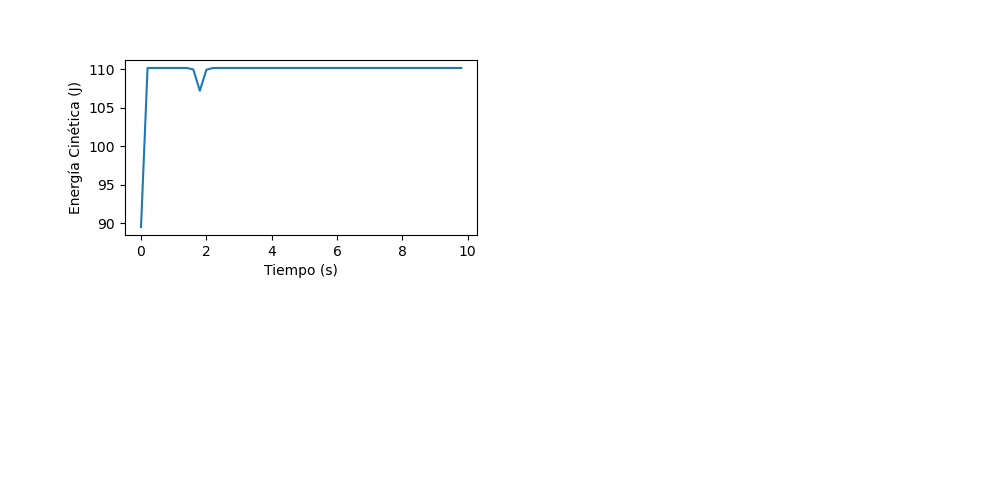

Text(0, 0.5, 'Energía Cinética (J)')

In [141]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(221)
ax4.plot(t1,KineticT)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Cinética (J)")

No se debería conservar la energía cinética total debido a que en este tipo de colisión, aunque no se ve afectada la masa de las partículas, sí se deforman luego de la colisión. Por lo tanto no se conserva la energía cinética.

e)

In [142]:
EnergyP = Particles[0].GetPotentialEnergy(scale)

In [143]:
for i in range(1,len(Particles)):
    EnergyP = np.add(EnergyP,Particles[i].GetPotentialEnergy(scale))


<IPython.core.display.Javascript object>


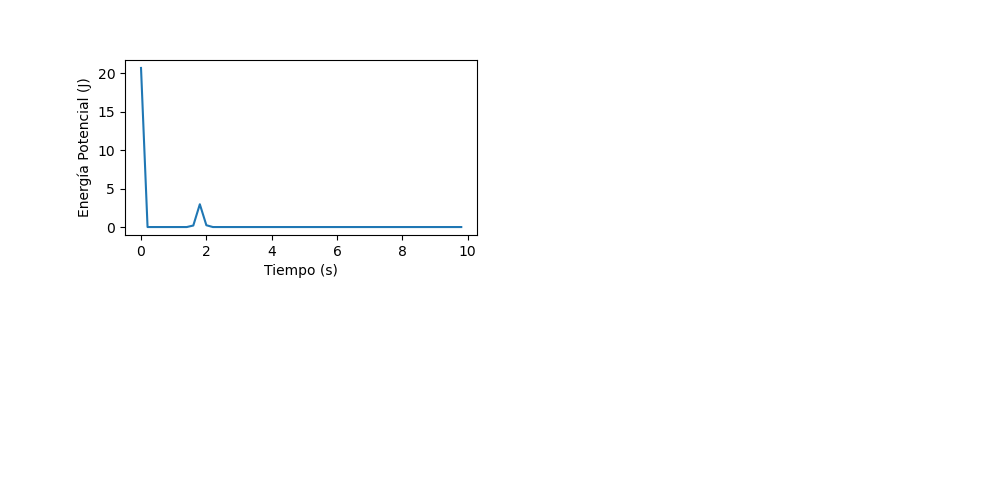

Text(0, 0.5, 'Energía Potencial (J)')

In [144]:
fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(221)
ax5.plot(t1,0.5*EnergyP)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Potencial (J)")

Una energía potencial positiva implica que durante las colisiones, parte de la energía cinética pasa a ser energía potencial. Esto se debe a que las bolitas se deforman al colisionar y, dado que su rigidez se lo permite, vuelven a su forma original, provocando que la energía potencial total sea positiva.

f)

<IPython.core.display.Javascript object>


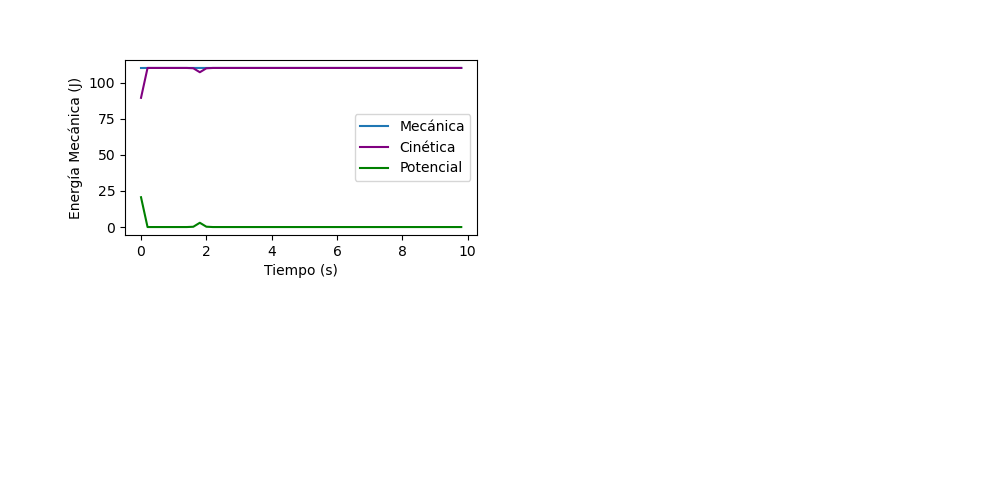

In [145]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(221)
plt.plot(t1,KineticT+0.5*EnergyP,label="Mecánica")
plt.plot(t1,KineticT,color="purple",label="Cinética")
plt.plot(t1,0.5*EnergyP,color="green",label="Potencial")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Mecánica (J)")
plt.legend()

La energía mecánica total sí se conserva ya que la fuerza con la que interactúan las partículas es conservativa. Por tanto, si bien la energía cinética y potencial no se conservan por sí mismas, al sumarlas sí se conservan.

g)


En la simulación, más específicamente en la gráfica de energía mecánica, se puede evidenciar que sí se conserva. Esto ocurre ya que la fuerza de interacción entre las partículas es conservativa. Por lo tanto, sí se cumple el teorema de trabajo y energía.



h)

In [146]:
L=np.cross(Particles[0].GetPosition(scale),Particles[0].GetMomentum(scale))


for i in range(1,len(Particles)):
    L_i=np.cross(Particles[i].GetPosition(scale),Particles[i].GetMomentum(scale))

    AngularMom = np.add(L,L_i)
    


<IPython.core.display.Javascript object>


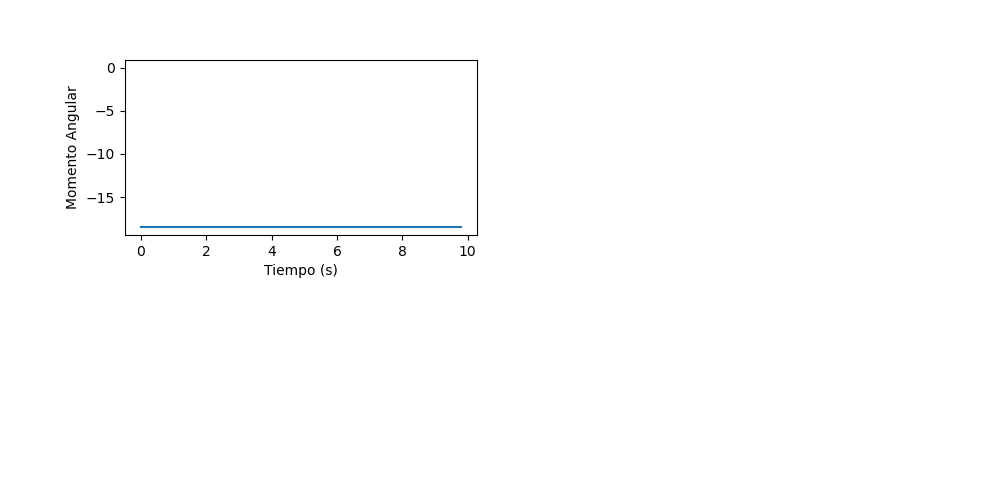

Text(0, 0.5, 'Momento Angular')

In [150]:
fig7 = plt.figure(figsize=(10,5))
ax7 = fig7.add_subplot(221)
ax7.plot(t1,AngularMom)
ax7.scatter(0,0,color="white")

plt.xlabel("Tiempo (s)")
plt.ylabel("Momento Angular")


El momento lineal se conserva ya que se tiene un sistema aislado, en el que la energía de las bolitas no se disipa y la fuerza de contacto entre las partículas es conservativa. Esto se debe a que durante el choque hay variaciones en la velocidad y posición de las partículas, pero al no interactuar con agentes exter

i)

Si se extendiera el sistema de 2D a 3D, las partículas iniciarían en posiciones arbitrarias dentro del volumen que se le asigne. De modo que, tendrían una velocidad y posición compuesta por componentes en los ejes x, y y z. Esto provocaría que las partículas colisionaran en distintas direcciones y los vectores de desplazamiento finales también estarían compuestos por estas tres componentes y, por ende, las partículas se moverían en todo el volumen.

3.

Sabiendo que una unidad astronómica equivale a $1.496\times 10^{11}$m y que en un año hay $3.156\times 10^{7}$ segundos, se plantea el siguiente factor de conversión.

In [174]:
c=3e8
au=1.496e11


$$
3\times 10^8 \frac{m}{s} \times \frac{3.156\times 10^7 s}{1 año} \times \frac{1 au}{1.496\times 10^{11}m}
$$

In [175]:
c_au=c*(3.156e7)/au
c_au

63288.770053475935

La velocidad de la luz en au/año es de $63288.77$au/año

4.

In [176]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

a)

In [177]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.387,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    #Sacados de Internet
    Marte=Planeta(0.093,1.524,t)
    Jupiter=Planeta(0.049,5.2,t)
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [178]:
dt = 0.001
tmax = 30
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [179]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [180]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 30000/30000 [00:02<00:00, 12813.77 Steps/s]


In [181]:
Planetas[4].GetPerihelio()

[11.848, 23.705000000000002]

In [182]:
scale = 20
t1 = t[::scale]

<IPython.core.display.Javascript object>


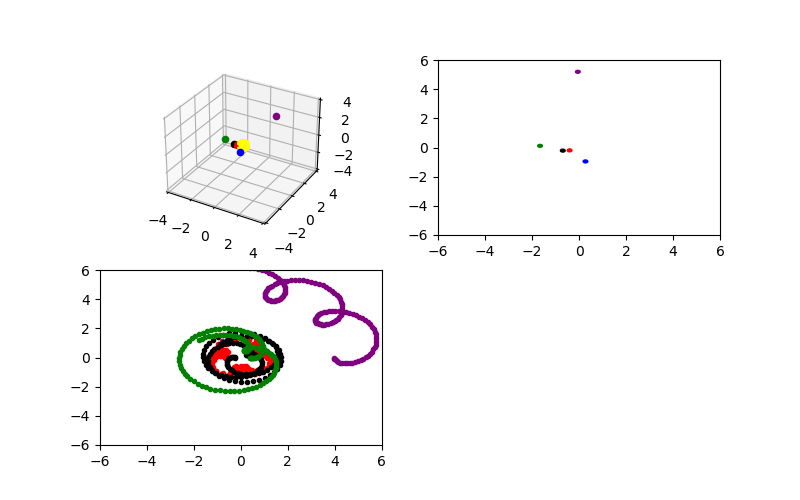

In [183]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['r','k','b',"green","purple"]

def init():
    
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-4,4)
    
    ax1.clear()
    ax1.set_xlim(-6,6)
    ax1.set_ylim(-6,6) 
    
    ax2.clear()
    ax2.set_xlim(-6,6)
    ax2.set_ylim(-6,6) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=70,color='yellow')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercurio visto desde Tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Venus visto desde Tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    #Marte Visto desde la Tierra
    Martx=Planetas[3].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Marty=Planetas[3].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    #Jupiter visto desde la Tierra
    Jupx=Planetas[4].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Jupy=Planetas[4].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    
    ax2.scatter(Mx,My,marker='.',label='Mercurio',color="red")
    ax2.scatter(Vx,Vy,marker='.',label='Venus',color="black")
    ax2.scatter(Martx,Marty,marker='.',label='Marte',color="green")
    ax2.scatter(Jupx,Jupy,marker='.',label='Jupiter',color="purple")
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)


b)

In [184]:
i=0
Periodos=[]

while i<=4:
    lista_perihelio=Planetas[i].GetPerihelio()
    periodo=lista_perihelio[1]-lista_perihelio[0]
    
    Periodos.append(periodo)
    i+=1
    
    
Periodos=np.array(Periodos)

Periodos

array([ 0.241,  0.615,  1.001,  1.881, 11.857])

Periodo de Mercurio: 0.241 años terrestres


Periodo de Venus: 0.615 años terrestres


Periodo de Marte: 1.881 años terrestres


Periodo de Júpiter: 11.857 años terrestres

c)

<IPython.core.display.Javascript object>


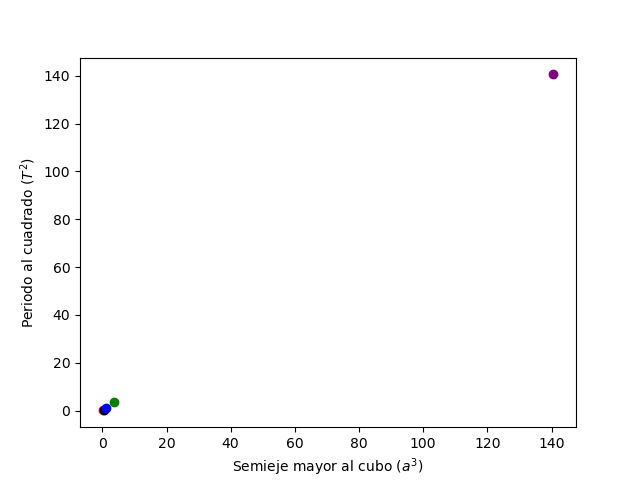

Text(0, 0.5, 'Periodo al cuadrado ($T^2$)')

In [189]:
Periodo_cuad=Periodos**2
semieje=np.array((0.387,0.7233,1.,1.524,5.2))**3

plt.scatter(semieje[0],Periodo_cuad[0],color="red")

plt.scatter(semieje[1],Periodo_cuad[1],color="black")

plt.scatter(semieje[2],Periodo_cuad[2],color="blue")

plt.scatter(semieje[3],Periodo_cuad[3],color="green")

plt.scatter(semieje[4],Periodo_cuad[4],color="purple")

plt.xlabel("Semieje mayor al cubo ($a^3$)")
plt.ylabel("Periodo al cuadrado ($T^2$)")

d)

In [190]:
def Regresion(I,V):
    n=len(I)

    sumI = np.sum(I)
    sumV = np.sum(V)

    m = (np.sum(I*V) - (sumI*sumV)/ n)/(np.sum(I**2) - (sumI**2)/n)
    b = (sumV - m*sumI)/n 
    
    IF=I.reshape((len(I),1))
    VF=V.reshape((len(V),1))
    model=linear_model.LinearRegression()
    model.fit(IF,VF)
    pred=model.predict(IF)
    R2=r2_score(VF,pred)
    
    return(m,b,R2)

In [191]:
reg=Regresion(semieje,Periodo_cuad)
xs=reg[0]*semieje + reg[1]

<IPython.core.display.Javascript object>


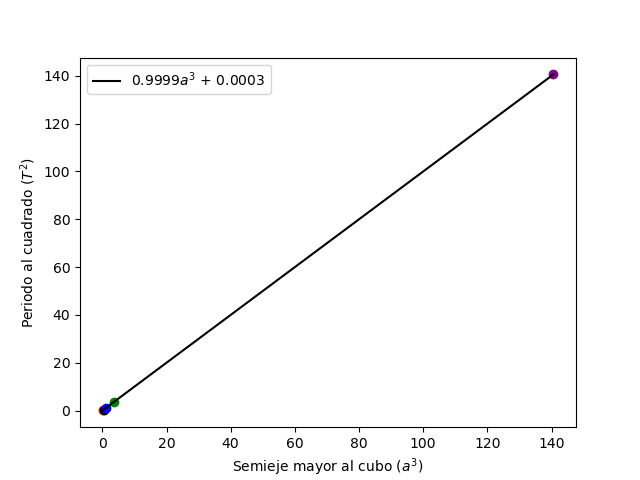

Text(0, 0.5, 'Periodo al cuadrado ($T^2$)')

In [192]:
plt.plot(semieje,xs,color="black",label=str(round(reg[0],4))+"$a^3$ + "+str(round(reg[1],4)))


plt.scatter(semieje[0],Periodo_cuad[0],color="red")

plt.scatter(semieje[1],Periodo_cuad[1],color="black")

plt.scatter(semieje[2],Periodo_cuad[2],color="blue")

plt.scatter(semieje[3],Periodo_cuad[3],color="green")

plt.scatter(semieje[4],Periodo_cuad[4],color="purple")


plt.legend()
plt.xlabel("Semieje mayor al cubo ($a^3$)")
plt.ylabel("Periodo al cuadrado ($T^2$)")

Dado que la pendiente es lineal, se corrobora la tercera ley de Kepler, que indica que el periodo al cuadrado es proporcional al cubo de la distancia media de cada planeta respecto al sol.

e)

In [193]:
Masa_gaus=1/reg[0]
Masa_SI=Masa_gaus*1.9885e30

Masa_gaus,Masa_SI

(1.0001413763864813, 1.9887811269445178e+30)

La masa del sol en unidades gaussianas es de 1.00014, y en unidades del sistema internacional 1.98878 Kg

8.

De acuerdo al método de euler se tiene que,
$$
u_{i+1}=u_{i}+\alpha \Delta t u_{i}
$$

De manera que , mediante una demostración por inducción, se tendría lo siguiente:

El caso base se da para i=0 y i=1:

$$
u_{(1)}=u_{0}+\alpha \Delta t u_{0}=u_{0}(1+\alpha \Delta t )\\
$$
$$
\begin{align*}
u_{2}&=u_{1}+\alpha \Delta t u_{1}\\
&=u_{1}(1+\alpha \Delta t )\\
&=u_{0}(1+\alpha \Delta t )(1+\alpha \Delta t )\\
&=u_{0}(1+\alpha \Delta t )^2
\end{align*}
$$


Paso inductivo:

Asumiendo $u_{n}=u_{0}(1+\alpha \Delta t )^n$, se obtiene que,

$$
\begin{align*}
u_{n+1}&=u_{0}(1+\alpha \Delta t )^n +u_{0}(1+\alpha \Delta t )^n \Delta t \alpha \\
&=u_{0}(1+\alpha \Delta t )^n[1+\Delta t \alpha]\\
&=u_{0}(1+\alpha \Delta t )^{n+1}
\end{align*}
$$

De modo que se cumple que al aplicar iterativamente se obtiene $u_k=(1+\alpha \Delta t)^ku_0$

Para $\alpha <0$


In [194]:
delta_t=np.array((1.1,1.5,1.9))
alpha=-1
it=10

In [195]:
t1=[1]
t2=[1]
t3=[1]
t_total=np.linspace(0,10,10)

for i in range(it-1):
    i+=1
    
    u1=t1[i-1]*(1+alpha*delta_t[0])
    t1.append(u1)
    u2=t2[i-1]*(1+alpha*delta_t[1])
    t2.append(u2)
    u3=t3[i-1]*(1+alpha*delta_t[2])
    t3.append(u3)

    

<IPython.core.display.Javascript object>


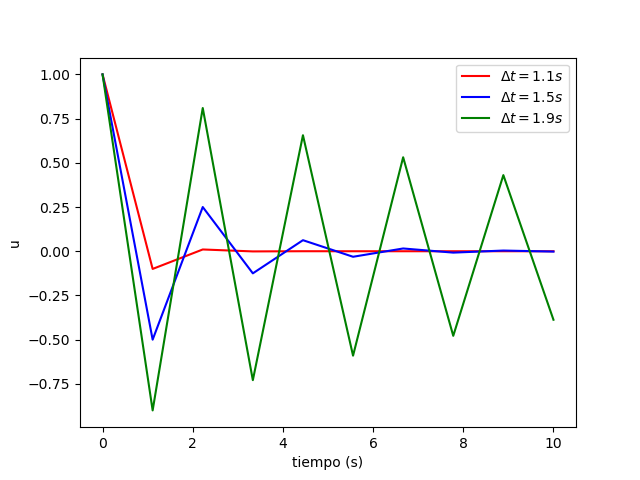

Text(0, 0.5, 'u')

In [196]:
plt.plot(t_total,t1,color="red",label="$\Delta t=1.1s$")
plt.plot(t_total,t2,color="blue",label="$\Delta t=1.5s$")
plt.plot(t_total,t3,color="green",label="$\Delta t=1.9s$")
plt.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("u")